## The iris dataset , we will clean our dataset, also visualise the dataset and predict based on the sepal and petal width and length to predict what iris species

## Data understanding

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
iris_df =pd.read_csv('IRIS.csv')
iris_df

sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

In [3]:
iris_df.shape

(150, 5)

In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
iris_df.describe(include ='all')

sepal_length  sepal_width  petal_length  petal_width      species
count     150.000000   150.000000    150.000000   150.000000          150
unique           NaN          NaN           NaN          NaN            3
top              NaN          NaN           NaN          NaN  Iris-setosa
freq             NaN          NaN           NaN          NaN           50
mean        5.843333     3.054000      3.758667     1.198667          NaN
std         0.828066     0.433594      1.764420     0.763161          NaN
min         4.300000     2.000000      1.000000     0.100000          NaN
25%         5.100000     2.800000      1.600000     0.300000          NaN
50%         5.800000     3.000000      4.350000     1.300000          NaN
75%         6.400000     3.300000      5.100000     1.800000          NaN
max         7.900000     4.400000      6.900000     2.500000          NaN

In [7]:
iris_df.duplicated().any()

True

In [8]:
iris_df[iris_df.duplicated]

sepal_length  sepal_width  petal_length  petal_width         species
34            4.9          3.1           1.5          0.1     Iris-setosa
37            4.9          3.1           1.5          0.1     Iris-setosa
142           5.8          2.7           5.1          1.9  Iris-virginica

In [9]:
iris_df.drop_duplicates(inplace = True)

In [10]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


from our data cleaning and analysis we have no null value and we also know what data type we are working with their statistics.

## Data visualization

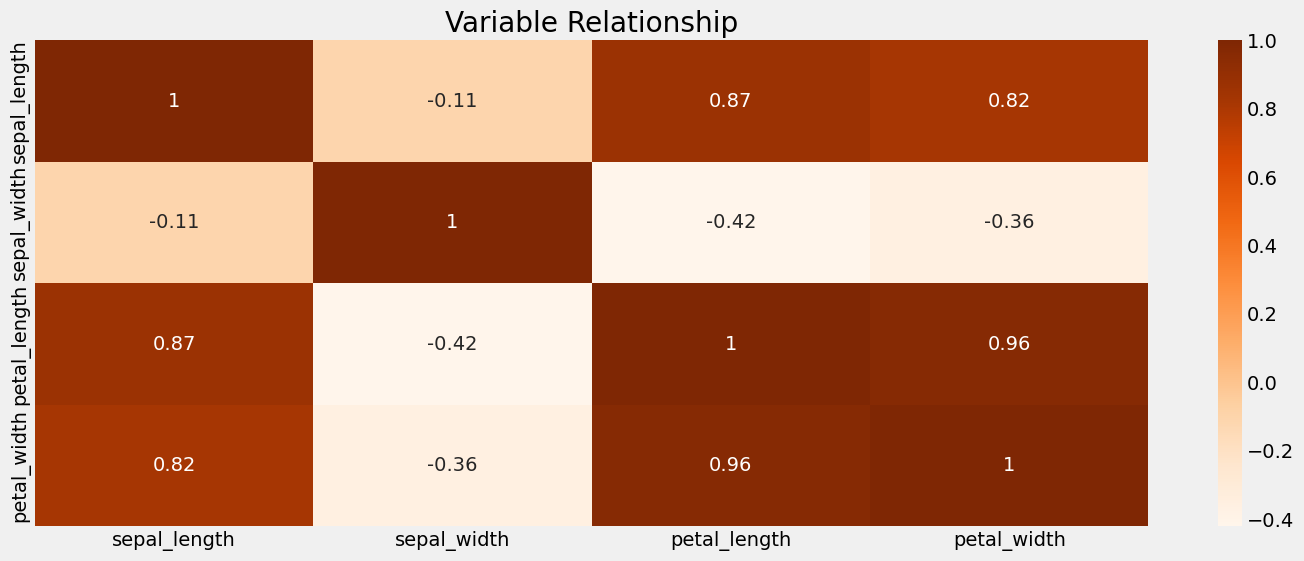

In [11]:
##We will see the relationship between variables 
iris_corr = iris_df.corr('pearson')
plt.figure(figsize=(16,6))
sns.heatmap(iris_corr, annot = True, cmap=('Oranges')).set_title('Variable Relationship')
plt.show()


We can see the relationship/correlation between sepal length,width with petal length,width

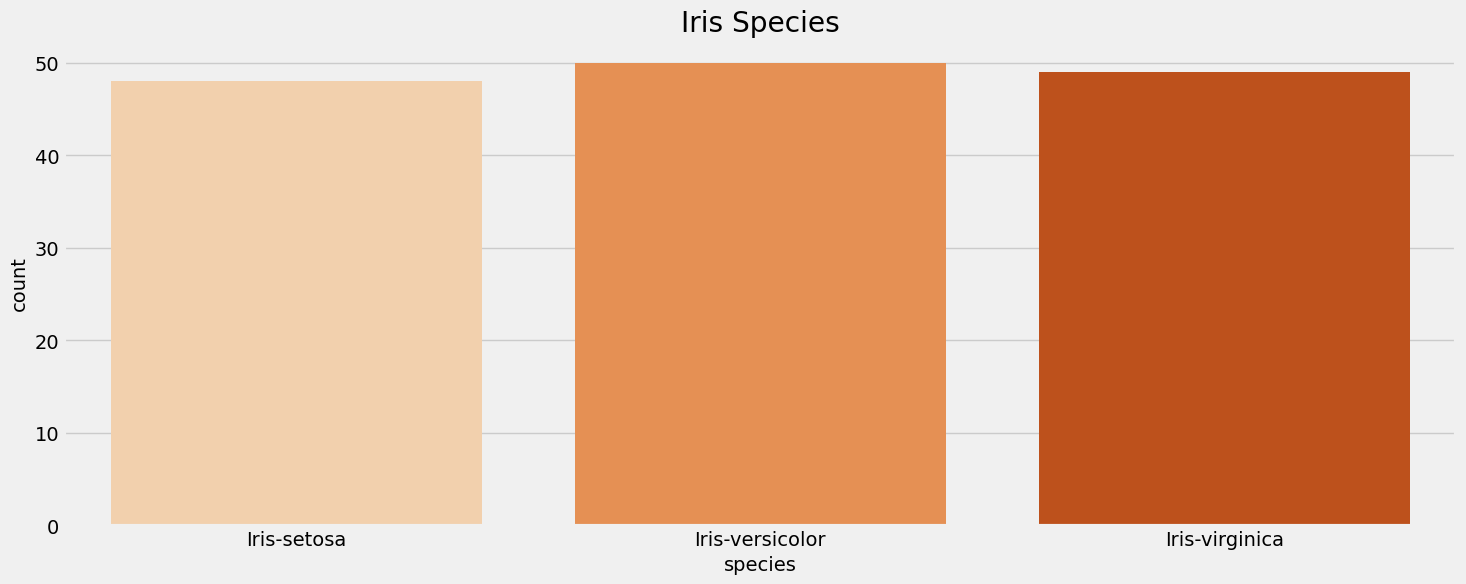

In [12]:
##visualising the target variable 
plt.figure(figsize=(16,6))
sns.countplot(data = iris_df, x='species', palette = 'Oranges').set_title('Iris Species')
plt.show()

In [13]:
##numerically
iris_df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

We can see that their values are same in the dataset and we have three species in the dataset

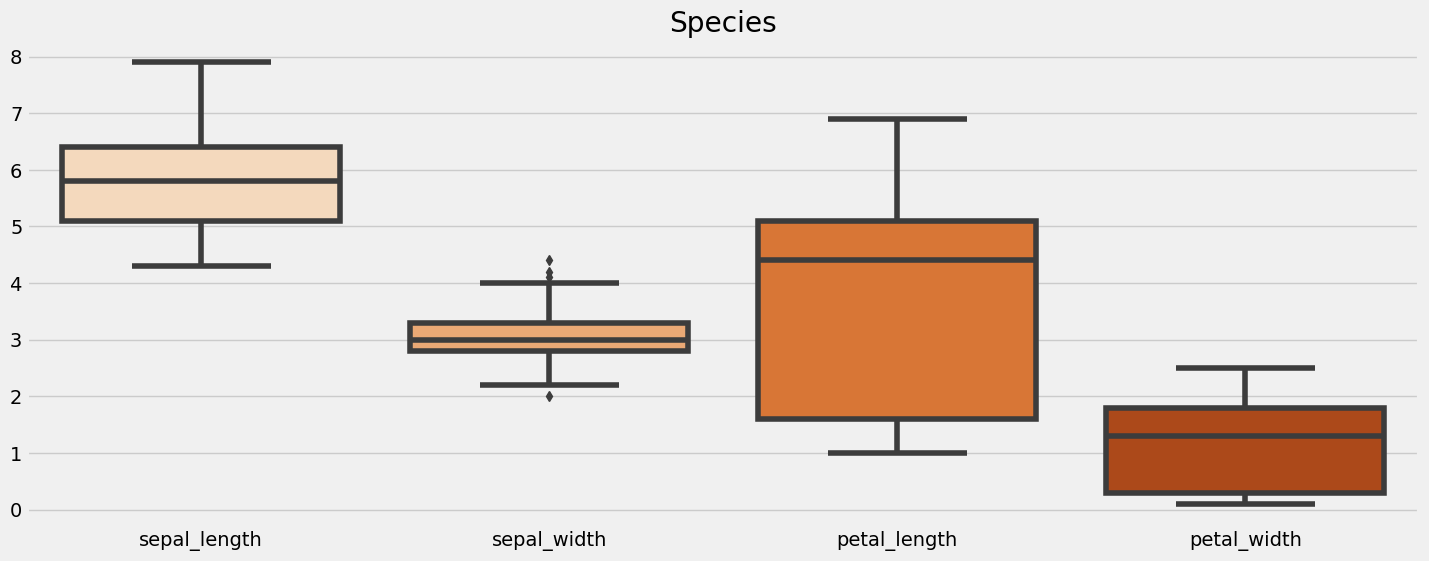

In [14]:
### weshall check for any anomality in the dataset using a boxplot before futher visualisation
plt.figure(figsize=(16,6))
sns.boxplot(data =iris_df, palette = 'Oranges').set_title('Species')
plt.show()

We can see that there is deviation in the sepal_width data we will use IQR to remove the outlier

In [15]:
## Outlier removal using IQR
Q1 = np.percentile(iris_df['sepal_width'], 25, interpolation = 'midpoint')
Q3 = np.percentile(iris_df['sepal_width'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print('Old shape:', iris_df.shape)
# UPPER
upper = np.where(iris_df['sepal_width'] >= (Q3+1.5*IQR))
# LOWER
lower = np.where(iris_df['sepal_width'] <= (Q1-1.5*IQR))
iris_df.drop(upper[0], inplace = True)
iris_df.drop(lower[0], inplace= True)
print('New shape:', iris_df.shape)

Old shape: (147, 5)
New shape: (143, 5)


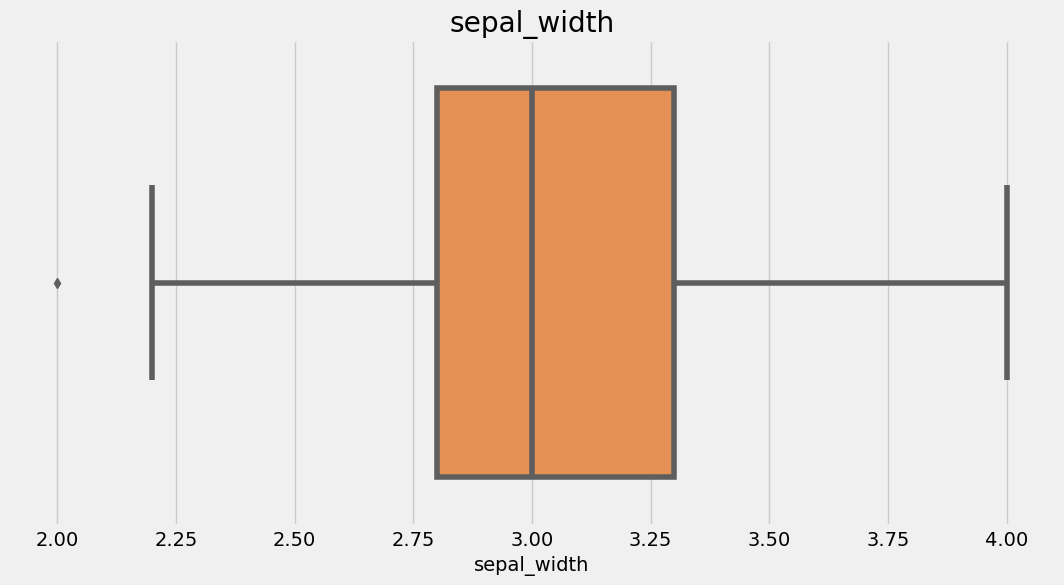

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(data = iris_df, x = 'sepal_width', palette ='Oranges').set_title('sepal_width')
plt.show()

we can see that the outliers is removed we can now futher our visualization 

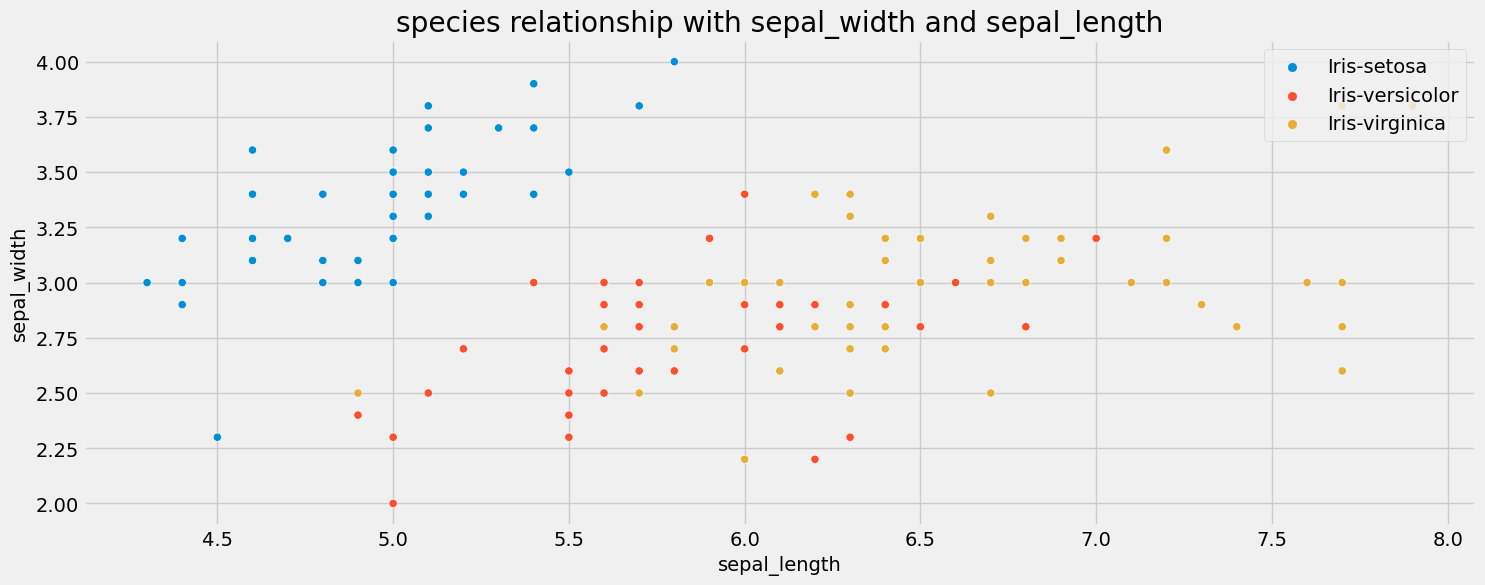

In [17]:
##using scatterplot to see relationship between sepal width and sepal length with species
plt.figure(figsize=(16,6))
sns.scatterplot(data =iris_df, x = 'sepal_length', y= 'sepal_width', hue = 'species').set_title('species relationship with sepal_width and sepal_length')
plt.legend(loc = 'upper right')
plt.show()

from the viz above we can say that the iris-setosa has a larger sepal width and a smaller sepal length
the iris-versicolor has sepal length and width lies in between (Medium size)
the iris-virginia has a larger sepal length and a smaller sepal width

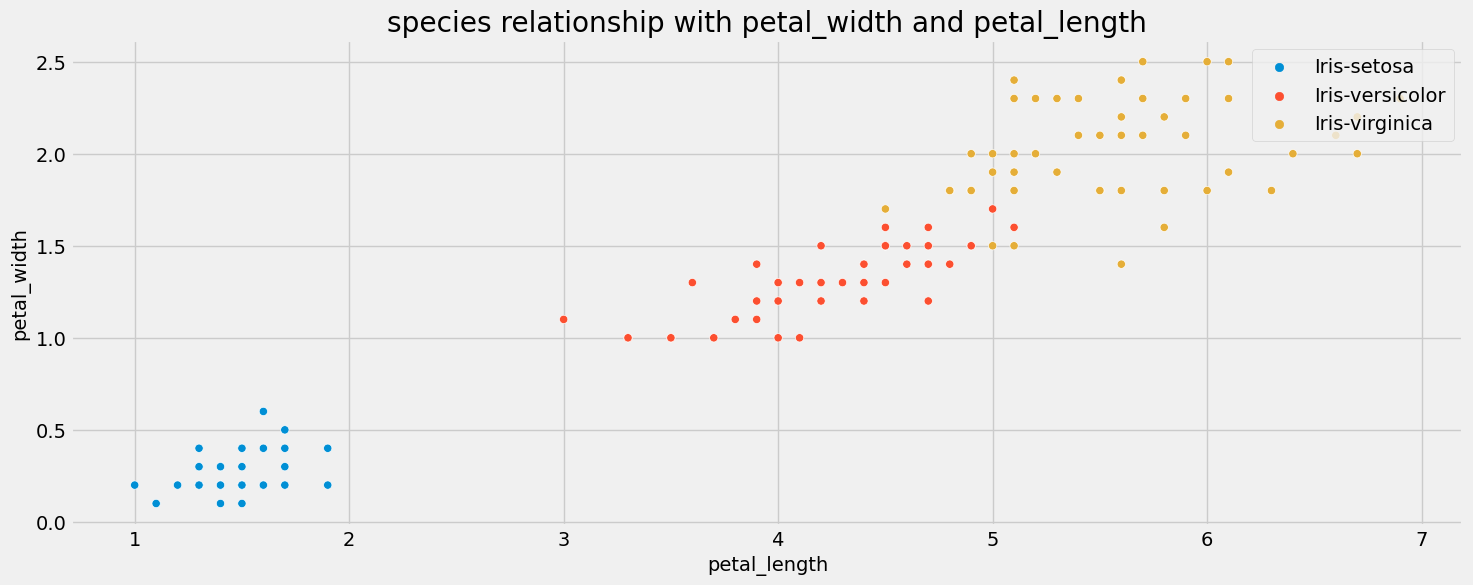

In [18]:
##using scatterplot to see relationship between sepal width and petal length with species
plt.figure(figsize=(16,6))
sns.scatterplot(data =iris_df, x = 'petal_length', y= 'petal_width', hue = 'species').set_title('species relationship with petal_width and petal_length')
plt.legend(loc = 'upper right')
plt.show()

from the viz we can see that the iris-setosa has a smaller petal width and a smaller pental length
The iris-versicolor has a medium size petal length and petal width
The iris-virginica has a larger petal width and larger petal length

<Figure size 1600x600 with 0 Axes>

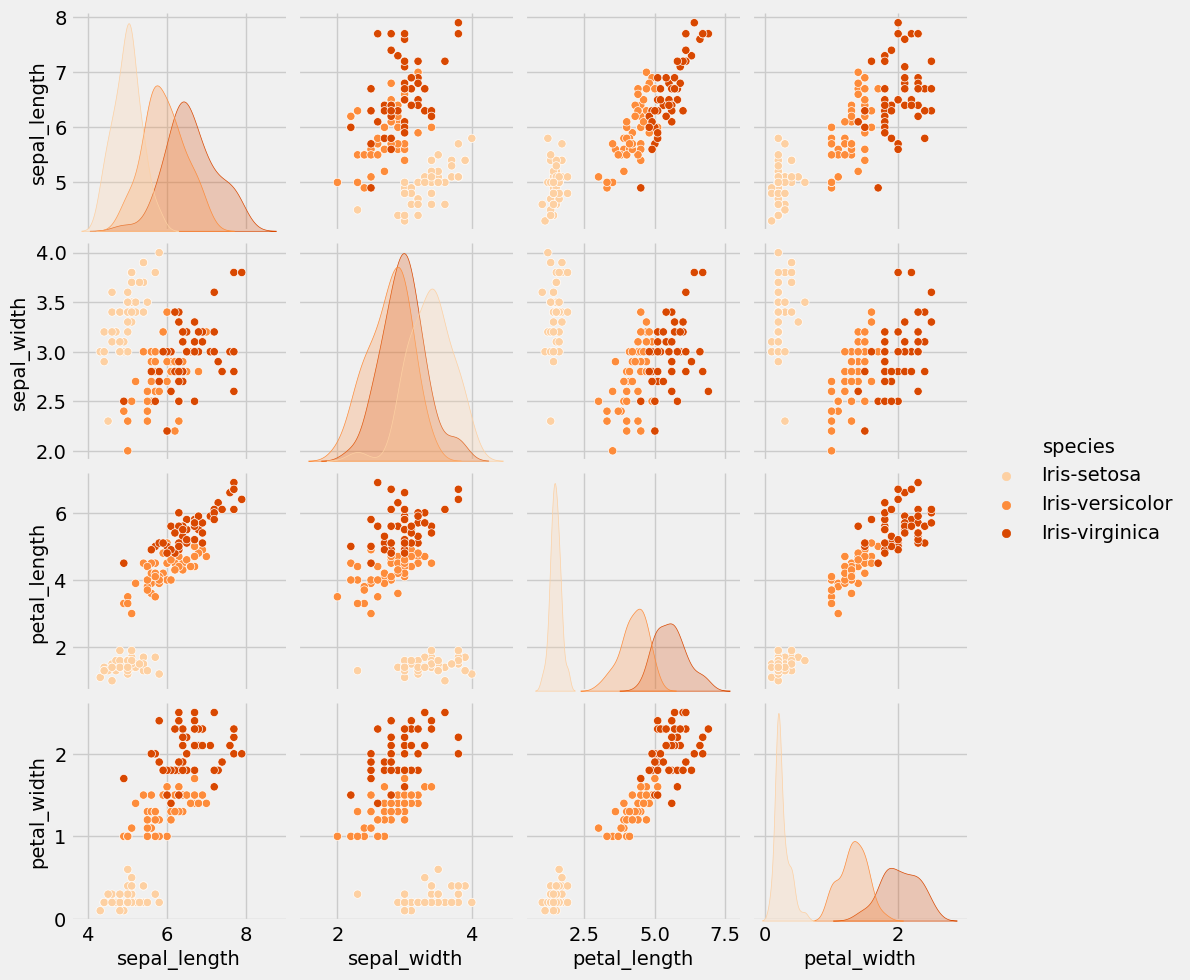

In [19]:
### using a pairplot to see variable
plt.figure(figsize=(16,6))
sns.pairplot(data = iris_df, palette='Oranges', hue='species')
plt.show()

## Data preparation

In [20]:
## mapping of species for data modelling
iris_df['species'] = iris_df['species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [21]:
iris_df['species'].unique()

array([0, 1, 2], dtype=int64)

In [22]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  143 non-null    float64
 1   sepal_width   143 non-null    float64
 2   petal_length  143 non-null    float64
 3   petal_width   143 non-null    float64
 4   species       143 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.7 KB


## Data Modelling

In [23]:
X = iris_df.drop('species', axis = 1)
y = iris_df['species']

In [24]:
X

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[143 rows x 4 columns]

In [25]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 143, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
le = LogisticRegression()

In [30]:
le.fit(X_train.values,y_train)

LogisticRegression()

In [31]:
pred = le.predict(X_test.values)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score = accuracy_score(y_test, pred)*100
print(accuracy_score)

89.65517241379311


In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc = RandomForestClassifier()

In [36]:
rfc.fit(X_train.values, y_train)

RandomForestClassifier()

In [37]:
pred2 = rfc.predict(X_test.values)


In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score = accuracy_score(y_test, pred2)*100
print(accuracy_score)

89.65517241379311


In [40]:
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
gbc = GradientBoostingClassifier()

In [42]:
gbc.fit(X_train.values, y_train)


GradientBoostingClassifier()

In [43]:
pred3 = gbc.predict(X_test.values)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score = accuracy_score(y_test, pred)*100


In [46]:
print(accuracy_score)

89.65517241379311


In [47]:
import pickle

In [48]:
pickle_out = open('gradientboostingclassifier.pkl', 'wb')
pickle.dump(gbc, pickle_out)
pickle_out.close

<function BufferedWriter.close>

In [49]:
pwd

'C:\\Users\\Dell\\codsoft 2'